https://stackoverflow.com/questions/66022256/modulenotfounderror-no-module-named-tensorflow-core-estimator-for-tensorflow

https://stackoverflow.com/questions/56561734/runtimeerror-tf-placeholder-is-not-compatible-with-eager-execution

https://stackoverflow.com/questions/52821476/how-to-solve-the-no-estimator-in-tensorflow

https://stackoverflow.com/questions/57250679/refvariable-object-has-no-attribute-id

https://fixexception.com/tensorflow/tf-placeholder-is-not-compatible-with-eager-execution/

https://www.tensorflow.org/api_docs/python/tf/GradientTape




In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

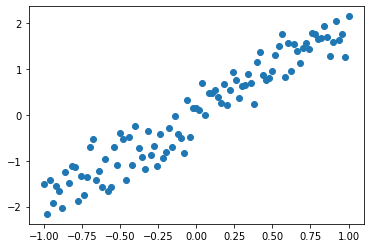

In [3]:
plt.scatter(x_train, y_train)
plt.show()

In [4]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# tf.enable_eager_execution()
# tf.disable_eager_execution()  #<--- Disable eager execution
# tf.GradientTape(
#     persistent=False, watch_accessed_variables=True
# )

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
learning_rate = 0.01 
training_epochs = 100

In [7]:
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

In [8]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)



In [9]:
def model(X, w):
    return tf.multiply(X, w)

In [10]:
w = tf.Variable(0.0, name="weights")

In [11]:
y_model = model(X, w)
cost = tf.square(Y-y_model)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


In [12]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

2022-03-04 19:22:03.842189: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-04 19:22:03.842471: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [13]:
for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

In [14]:
w_val = sess.run(w)

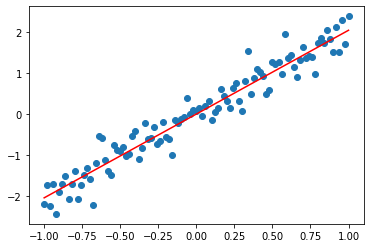

In [15]:
sess.close()
plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

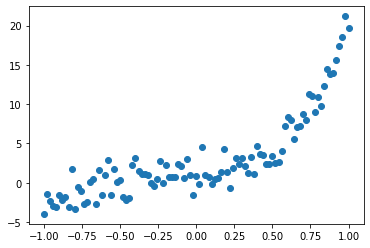

In [16]:
learning_rate = 0.01
training_epochs = 40
trX = np.linspace(-1, 1, 101)
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)
trY += np.random.randn(*trX.shape) * 1.5
plt.scatter(trX, trY)
plt.show()

In [17]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)

cost = (tf.pow(Y-y_model, 2))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[1.0255259 2.426989  3.8572    5.1165967 3.5755954 4.5895405]


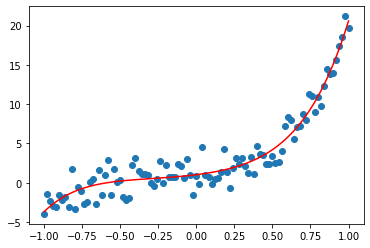

In [18]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for epoch in range(training_epochs):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})
w_val = sess.run(w)
print(w_val)
sess.close()
plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
plt.plot(trX, trY2, 'r')
plt.show()

# RESTART here

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.enable_eager_execution()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    np.random.shuffle(arr)
    num_train = int(ratio * x_dataset.size)
    x_train = x_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_train = y_dataset[arr[0:num_train]]
    y_test = y_dataset[arr[num_train:x_dataset.size]]
    return x_train, x_test, y_train, y_test

In [6]:
learning_rate = 0.001
training_epochs = 1000
reg_lambda = float(0)
num_coeffs = 9
x_dataset = np.linspace(-1, 1, 100)



In [7]:
y_dataset_params = [0.] * num_coeffs
y_dataset_params[2] = 1
y_dataset = 0
for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape) * 0.3

In [8]:
(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)


In [9]:
X = tf.constant(x_train, dtype=tf.float32)
Y = tf.constant(y_train, dtype=tf.float32)
w = tf.Variable([0.] * num_coeffs, name='parameters', dtype=tf.float32)

2022-03-04 19:23:15.815728: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-04 19:23:15.815982: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [10]:
@tf.function
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)    
    return tf.add_n(terms)

In [11]:
@tf.function
def y_model():
    return model(X, w)

In [12]:
@tf.function
def cost():
    w_sqr = tf.square(w)
    w_red = tf.reduce_sum(w_sqr)
    m_lmd_w_sqr = tf.multiply(tf.convert_to_tensor(reg_lambda, dtype=tf.float32), w_red)
    y_y_model_sqr = tf.reduce_sum(tf.square(Y-y_model()))
    sum_y_model_sqr_reglambda_w_sqr = tf.add(y_y_model_sqr, m_lmd_w_sqr)
    return tf.math.divide(sum_y_model_sqr_reglambda_w_sqr, 2*x_train.size)

In [13]:
train_op = tf.keras.optimizers.SGD(learning_rate)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


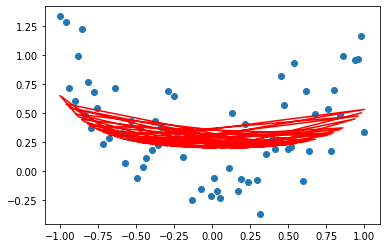

reg lambda 0.0
final cost tf.Tensor(
[ 0.1984597  -0.01971183  0.13539529 -0.01532003  0.10193265 -0.01327285
  0.08327316 -0.01130731  0.07101122], shape=(9,), dtype=float32)


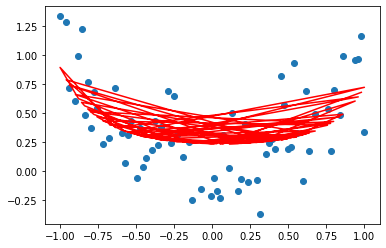

reg lambda 0.010101010101010102
final cost tf.Tensor(
[ 0.2353662  -0.02541238  0.19416541 -0.02153314  0.14945635 -0.02042716
  0.12305505 -0.01847981  0.10520969], shape=(9,), dtype=float32)


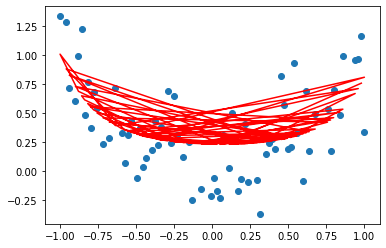

reg lambda 0.020202020202020204
final cost tf.Tensor(
[ 0.23028898 -0.0259902   0.22761035 -0.0243328   0.17763433 -0.02522602
  0.1468315  -0.02400934  0.12558676], shape=(9,), dtype=float32)


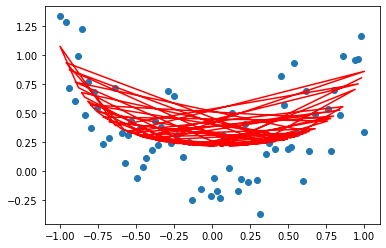

reg lambda 0.030303030303030304
final cost tf.Tensor(
[ 0.21640907 -0.02452021  0.25105003 -0.02569108  0.1972441  -0.02899695
  0.16317795 -0.02880308  0.13938034], shape=(9,), dtype=float32)


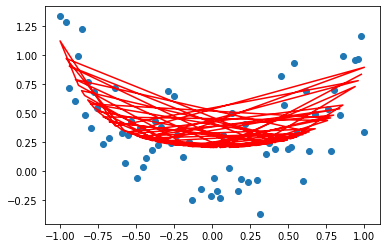

reg lambda 0.04040404040404041
final cost tf.Tensor(
[ 0.20250581 -0.02217882  0.2694164  -0.02635955  0.21198748 -0.03225206
  0.1751338  -0.03321864  0.14920406], shape=(9,), dtype=float32)


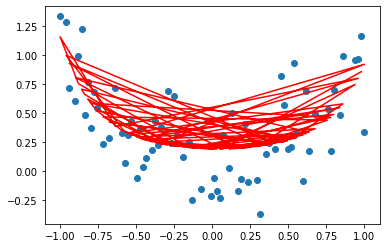

reg lambda 0.05050505050505051
final cost tf.Tensor(
[ 0.19055589 -0.01946878  0.28456622 -0.02665571  0.22342154 -0.03520712
  0.18403997 -0.03740626  0.15624219], shape=(9,), dtype=float32)


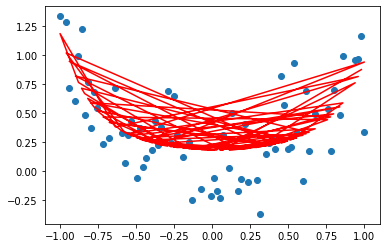

reg lambda 0.06060606060606061
final cost tf.Tensor(
[ 0.1807122  -0.01662765  0.2973881  -0.02672705  0.23238866 -0.03795994
  0.19065577 -0.04143143  0.16118154], shape=(9,), dtype=float32)


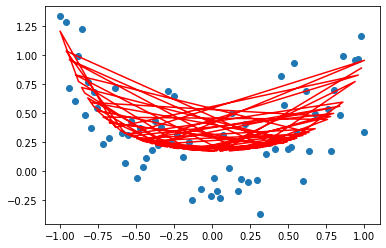

reg lambda 0.07070707070707072
final cost tf.Tensor(
[ 0.17269489 -0.01377654  0.3084199  -0.02664762  0.23944516 -0.04055737
  0.19549668 -0.04532295  0.16449516], shape=(9,), dtype=float32)


In [14]:
iters = 0
for reg_lambda in np.linspace(0, 1, 100):
    iters += 1
    for epoch in range(training_epochs):
        train_op.minimize(cost, w)
        final_cost = w.value()
    
    # Print the first 8 attempts (for illustration)
    if iters in range(9):
        plt.scatter(x_train, y_train)

        y1 = 0
        for i in range(num_coeffs):
            y1 += final_cost[i] * np.power(X, i)

        plt.plot(x_train, y1, 'r')
        plt.show()
        
        print('reg lambda', reg_lambda)
        print('final cost', final_cost)

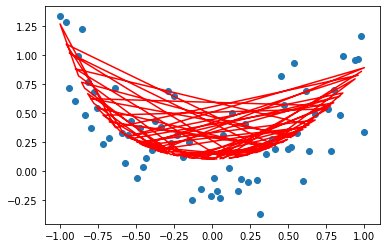

Final result


In [15]:
plt.scatter(x_train, y_train)

y1 = 0
for i in range(num_coeffs):
    y1 += final_cost[i] * np.power(X, i)

plt.plot(x_train, y1, 'r')
plt.show()
print("Final result")

In [ ]:
# learning_rate = 0.001
# training_epochs = 1000
# reg_lambda = float(0)
# x_dataset = np.linspace(-1, 1, 100)
# num_coeffs = 9


# y_dataset_params = [0.] * num_coeffs
# y_dataset_params[2] = 1
# y_dataset = 0
# for i in range(num_coeffs):
#     y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
# y_dataset += np.random.randn(*x_dataset.shape) * 0.3

# (x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)

# X = tf.placeholder(tf.float32)
# Y = tf.placeholder(tf.float32)

# def model(X, w):
#     terms = []
#     for i in range(num_coeffs):
#         term = tf.multiply(w[i], tf.pow(X, i))
#         terms.append(term)
#     return tf.add_n(terms)


# w = tf.Variable([0.] * num_coeffs, name="parameters") 
# y_model = model(X, w)
# cost = tf.div(tf.add(tf.reduce_sum(tf.square(Y-y_model)),
#                      tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))), 2*x_train.size)

# train_op = tf.train.GradientDescentOptimizer(learning_rate)#.minimize(cost)

# sess = tf.Session()
# init = tf.global_variables_initializer()
# sess.run(init)

# for reg_lambda in np.linspace(0,1,100):
#     for epoch in range(training_epochs):
#         sess.run(train_op, feed_dict={X: x_train, Y: y_train}) 
#     final_cost = sess.run(cost, feed_dict={X: x_test, Y:y_test}) 
#     print('reg lambda', reg_lambda)
#     print('final cost', final_cost)
        
# sess.close()
